<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/KERAS_AND_TENSORFLOW_IMAGE_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:


!pip install tensorflow


In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


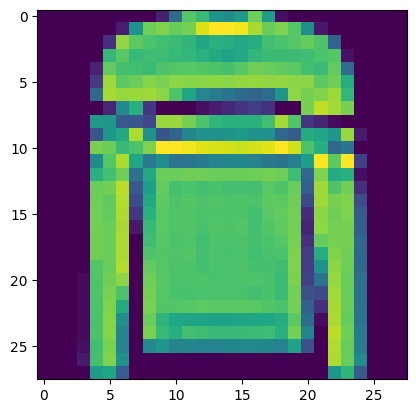

In [5]:
plt.imshow(X_train_full[5])

In [6]:
y_train_full[1]

0

In [7]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(class_names)


['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 3.3209 - accuracy: 0.7009
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6425 - accuracy: 0.7685
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5678 - accuracy: 0.7972
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5545 - accuracy: 0.8055
Epoch 5/5
1/1 [==============================] - 0s 78ms/step


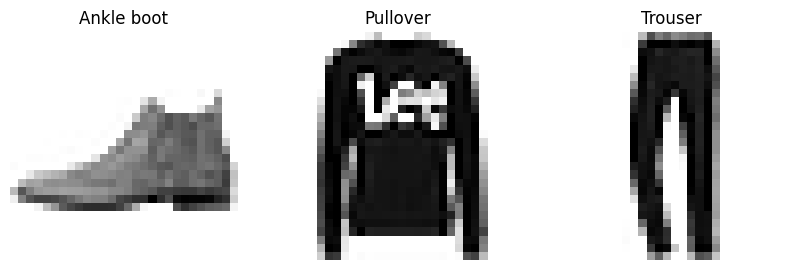

In [8]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_full, y_train_full, epochs=5)

model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=1)
plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(X_new[i], cmap="binary")
    plt.title(class_names[y_pred[i]])
    plt.axis('off')
plt.show()


In [9]:


print(f"Accuracy: {model.evaluate(X_test, y_test)[1]:.2%}")


313/313 [==============================] - 1s 2ms/step - loss: 0.5538 - accuracy: 0.8054
Accuracy: 80.54%


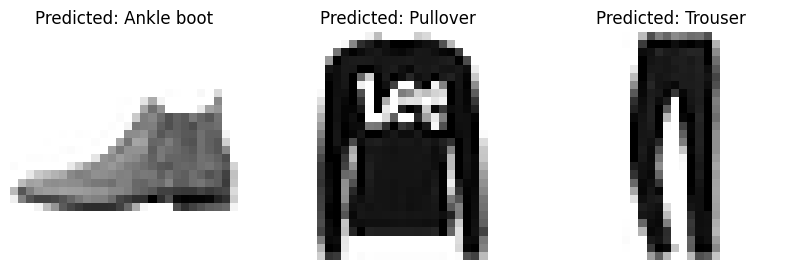

In [11]:

plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(X_test[i], cmap="binary")
    plt.title(f"Predicted: {class_names[y_pred[i]]}")
    plt.axis('off')
plt.show()
